# CE-40959: Deep Learning
## HW2 - CIFAR-10 Classification (Pytorch)

(18 points)

### Deadline: 23 Esfand

#### Name:
#### Student No.:


Please review `Pytorch Tutorial` notebook (materials of the TA classes) before coming to this notebook and you can use `pytorch.org` to learn how to use PyTorch classes and commands.

In this part you have to implement MLP for Classification of CIFAR-10 dataset. 

PyTorch provides the elegantly designed modules and classes `torch.nn`, `torch.optim` , `Dataset` , and `DataLoader` to help you create and train neural networks. In this homework you use them for your implementations.

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
import torchvision


#### 3.1. Load Data:

Complete the followed cell for data loading. 
In this cell you have to normalize, split and shuffle data for learning.

In [ ]:
import torchvision.transforms as transforms
normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
transform = transforms.Compose(
            [#transforms.Resize((3*32*32, 1)),
             transforms.ToTensor(),
             transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                  std=[0.5, 0.5, 0.5]),
             ])
# koja save mishe in dataset        
train_valid_set = torchvision.datasets.CIFAR10(root='/content/gdrive/data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='/content/gdrive/data', train=False, download=True, transform=transform)
train_size = 0.9
num_train_valid = len(train_valid_set)
split = int(np.floor(train_size * num_train_valid))
train_set, valid_set = torch.utils.data.random_split(train_valid_set,(split, num_train_valid-split))


#num_train = len(train_valid_set)
#indices = list(range(num_train))

#np.random.shuffle(indices)
#train_idx, valid_idx = indices[split:], indices[:split]
#train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_idx)
#valid_sampler = torch.utils.data.sampler.SubsetRandomSampler(valid_idx)


#train_set, valid_set = train_valid_set[split:], train_valid_set[:split] 
    
batch_size_train = 100
batch_size_test = 100

trainloader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle = True,
                                           num_workers=2)
validationloader = torch.utils.data.DataLoader(valid_set, batch_size=100, shuffle = True,
                                           num_workers=2)
testloader = torch.utils.data.DataLoader(test_set, batch_size=100, shuffle = True,
                                           num_workers=2)
##################################################################################
# TODO: Use 'torchvision.datasets.CIFAR-10' class for loading CIFAR-10 dataset.  #
# This dataset has 50000 data for training and 10000 data for test and every     #
# data has shape (3*32*32).                                                      #
# Also Use 'torchvision.transforms.Compose' for common image transformations     #
# such as normalization and use 'torch.utils.data.DataLoader' class that it      #
# represents a Python iterable over a dataset and divides data to Batches.       #
# Then Split data into 3 part: Train, Validation and Test. Finally,              #
# save iterable data in 'trainloader', 'validationloader', 'testloader'.         #
##################################################################################


##################################################################################
#                               End of your code                                 #
##################################################################################

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting /content/gdrive/data/cifar-10-python.tar.gz to /content/gdrive/data
Files already downloaded and verified


#### 3.2. Load Data Test:

In [ ]:
############################################################
# Run the following code an check the size of each batch   #
############################################################
examples = enumerate(trainloader)
batch_idx, (example_data, example_targets) = next(examples)
print('The size and type of each batch in ''trainloader'' is:')
print(example_data.size())
print(type(example_data))
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)
print('\nThe size and type of each batch in ''testloader'' is:')
print(example_data.size())
print(type(example_data))

The size and type of each batch in trainloader is:
torch.Size([100, 3, 32, 32])
<class 'torch.Tensor'>

The size and type of each batch in testloader is:
torch.Size([100, 3, 32, 32])
<class 'torch.Tensor'>


<class 'torch.Tensor'>
torch.Size([3, 32, 32])


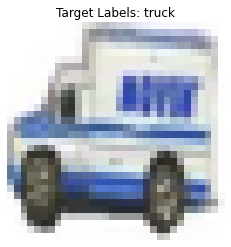

<class 'torch.Tensor'>
torch.Size([3, 32, 32])


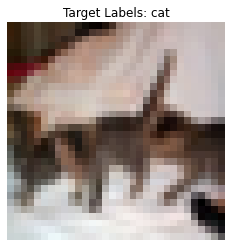

<class 'torch.Tensor'>
torch.Size([3, 32, 32])


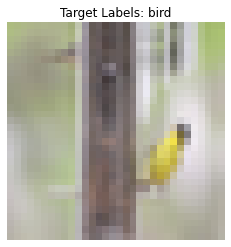

<class 'torch.Tensor'>
torch.Size([3, 32, 32])


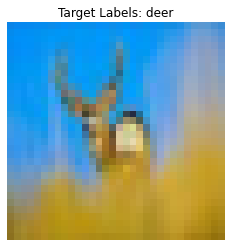

In [ ]:
#####################################################################
# Run the following code and see some of the samples in the dataset #
#####################################################################

dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images:
for i in range(4):
    img=torchvision.utils.make_grid(images[i])
    print(type(img))
    print(img.size())
    ###########################################################
    #  If you normalize data , here unnormalize them to see   # 
    #  clear them.                                            #
    ###########################################################
    m=0.5
    s=0.5
    img = img *s+m    # unnormalize
    ###########################################################
    #                   End of your code                      #
    ###########################################################
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2, 0)))
    plt.title("Target Labels: {}".format(classes[labels[i]]))
    plt.axis('off')
    plt.show()
    

#### 3.3. Network Design:
Design the layer of your network and select proper hyperparameter. 



In [ ]:
import torch.nn as nn

######################################################################
# TODO: Use 'torch.nn' module to design your network for CIFAR-10    #
# classification. You have to implement the structure of MLP for it. #
# In your design you don't have any limitation and you can use       #
# Batch-norm layers, Drop-out layers and etc for generalization      #
# improvement (if needed). Use classes and modules from 'torch.nn'.  #
# In the following code, the 'MLP' class is your MLP network and     #
# this class is inherited from nn.Module, so you can benefit         #
# properties of the 'nn.Module'.You may complete '__init__()'        #
# constructor by some classes like 'nn.ReLU()' or 'nn.Linear()'      #
# to use them in the forward pass of your network.                   #
######################################################################
  
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(3*32*32, 1000),
            nn.BatchNorm1d(1000),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(1000, 500),
            nn.BatchNorm1d(500),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(500, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(100, 10),
            nn.Softmax(dim=1),
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.layers(x)
        return x

######################################################################
#                          End of your code                          #
######################################################################

#### 3.4. Optimization Algorithm:

In [ ]:
import torch.optim as optim

#############################################################################
# TODO: Use a Classification Cross-Entropy loss.Then, use 'torch.optim'     #
# module to optimize Cross-Entropy loss. You should select a optimization   #
# algorithm and its hyperparameters like learning rate.                     #
#############################################################################
net = MLP()
learning_rate = 1e-3
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

#############################################################################
#                             End of your code                              #
#############################################################################

#### 3.5. Training:
You have to tweak `hidden_dim`, `leanirng_rate`, `weight_scale`, `num_epochs` and `reg` and etc to get a validation accuracy above 50%.

In [ ]:
#######################################################
# TODO: Feed the inputs data to the MLP network and   #
# optimize Cross-Entropy loss by using target labels. #
# Then update weights and biases.                     #
#######################################################

num_epochs=100
num_batchs = len(trainloader)
for epoch in range(num_epochs):
    total_train=0
    correct_train=0
    running_loss = 0.0
    for batch, data in enumerate(trainloader, 0):
        inputs, labels = data

        # zero the parameter gradients:
        optimizer.zero_grad()

        # forward pass:
        outputs = net.forward(inputs)

        # backward pass:
        loss = criterion(outputs, labels)
        loss.backward()

        # optimization:
        optimizer.step()
        #############################################
        #           End of your code                #
        #############################################
        

        # Results: 
        running_loss += loss.item()

        total_train += labels.size(0)
        _, predicted_train = torch.max(outputs.data, 1)
        correct_train += (predicted_train == labels).sum().item()

        if batch % (num_batchs/10) == ((num_batchs/10) -1):
            print('[Batch %d / %d] loss: %.3f' %
                  (batch + 1, num_batchs, running_loss / (num_batchs/10)))
            running_loss = 0.0
            torch.save(net.state_dict(), './model.pth')
            torch.save(optimizer.state_dict(), './optimizer.pth')
    correct = 0
    total = 0
    with torch.no_grad():
        for data in validationloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_acc = correct / total
    train_acc = correct_train / total_train
    print('(Epoch %d / %d) train acc: %.2f%%; val_acc: %.2f%%' % (
          epoch+1, num_epochs, 100*train_acc, 100*val_acc))

[Batch 45 / 450] loss: 2.243
[Batch 90 / 450] loss: 2.190
[Batch 135 / 450] loss: 2.145
[Batch 180 / 450] loss: 2.140
[Batch 225 / 450] loss: 2.129
[Batch 270 / 450] loss: 2.110
[Batch 315 / 450] loss: 2.110
[Batch 360 / 450] loss: 2.110
[Batch 405 / 450] loss: 2.099
[Batch 450 / 450] loss: 2.092
(Epoch 1 / 100) train acc: 32.78%; val_acc: 38.02%
[Batch 45 / 450] loss: 2.079
[Batch 90 / 450] loss: 2.083
[Batch 135 / 450] loss: 2.070
[Batch 180 / 450] loss: 2.077
[Batch 225 / 450] loss: 2.070
[Batch 270 / 450] loss: 2.069
[Batch 315 / 450] loss: 2.073
[Batch 360 / 450] loss: 2.059
[Batch 405 / 450] loss: 2.062
[Batch 450 / 450] loss: 2.058
(Epoch 2 / 100) train acc: 39.01%; val_acc: 41.30%
[Batch 45 / 450] loss: 2.045
[Batch 90 / 450] loss: 2.045
[Batch 135 / 450] loss: 2.045
[Batch 180 / 450] loss: 2.036
[Batch 225 / 450] loss: 2.042
[Batch 270 / 450] loss: 2.045
[Batch 315 / 450] loss: 2.038
[Batch 360 / 450] loss: 2.036
[Batch 405 / 450] loss: 2.044
[Batch 450 / 450] loss: 2.039
(Epo

#### 3.6. Test: 
Run the following cell and test your network.

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
test_acc = correct / total
print('Accuracy of the network on the test images: %2f %%' % (100 * test_acc ))

Accuracy of the network on the test images: 50.430000 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 55 %
Accuracy of   car : 52 %
Accuracy of  bird : 29 %
Accuracy of   cat : 38 %
Accuracy of  deer : 33 %
Accuracy of   dog : 28 %
Accuracy of  frog : 57 %
Accuracy of horse : 66 %
Accuracy of  ship : 62 %
Accuracy of truck : 68 %


In [ ]:
ls

sample_data/


In [ ]:
cd ..

/


In [ ]:
ls


bin/                                       etc/    opt/    sys/
boot/                                      home/   proc/   tensorflow-1.15.2/
content/                                   lib/    root/   tmp/
datalab/                                   lib32/  run/    tools/
dev/                                       lib64/  sbin/   usr/
dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl  media/  srv/    var/
dlib-19.18.0-cp36-cp36m-linux_x86_64.whl   mnt/    swift/


In [ ]:
cd content

/content


In [ ]:
ls


sample_data/


In [ ]:
cd gdrive

[Errno 2] No such file or directory: 'gdrive'
/content


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
ls


gdrive/  sample_data/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
